# Notebook: 01_BTC_basic_analysis
# Week 1: Download and analyze Bitcoin data

In [ ]:
# Imports
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


# Download Bitcoin data (latest data included)

btc = yf.download("BTC-USD", start="2020-01-01")  # no 'end' to get latest data

In [2]:
# Quick data overview

print("Data shape:", btc.shape)
print("Columns:", btc.columns)
print("First 5 rows:")
btc.head()

Data shape: (2070, 5)
Columns: MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])
First 5 rows:


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [3]:
# Compute daily returns, cumulative returns, rolling volatility (30-day)

btc['Daily Return'] = btc['Close'].pct_change()

btc['Cumulative Return'] = (1 + btc['Daily Return']).cumprod() - 1

btc['Volatility_30d'] = btc['Daily Return'].rolling(window=30).std()

In [4]:
# Basic statistics

print("Mean daily return:", btc['Daily Return'].mean())

print("Standard deviation of daily returns:", btc['Daily Return'].std())

print("Last 5 rows:")
btc.tail()

Mean daily return: 0.001848162912652363
Standard deviation of daily returns: 0.03247068775123996
Last 5 rows:


Price,Close,High,Low,Open,Volume,Daily Return,Cumulative Return,Volatility_30d
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,
Date,,,,,,,,
2025-08-27,111222.062500,112619.414062,110398.265625,111795.710938,62137056409,-0.005193,14.447135,0.017911
2025-08-28,112544.804688,113450.078125,110900.921875,111219.054688,58860155962,0.011893,14.630844,0.018082
2025-08-29,108410.835938,112619.054688,107559.625000,112550.523438,77843379644,-0.036732,14.056696,0.019197
2025-08-30,108808.070312,108929.351562,107444.445312,108409.406250,51486264208,0.003664,14.111866,0.019016
2025-08-31,108478.390625,109457.398438,108478.390625,108823.390625,44444094464,-0.003030,14.066078,0.018671


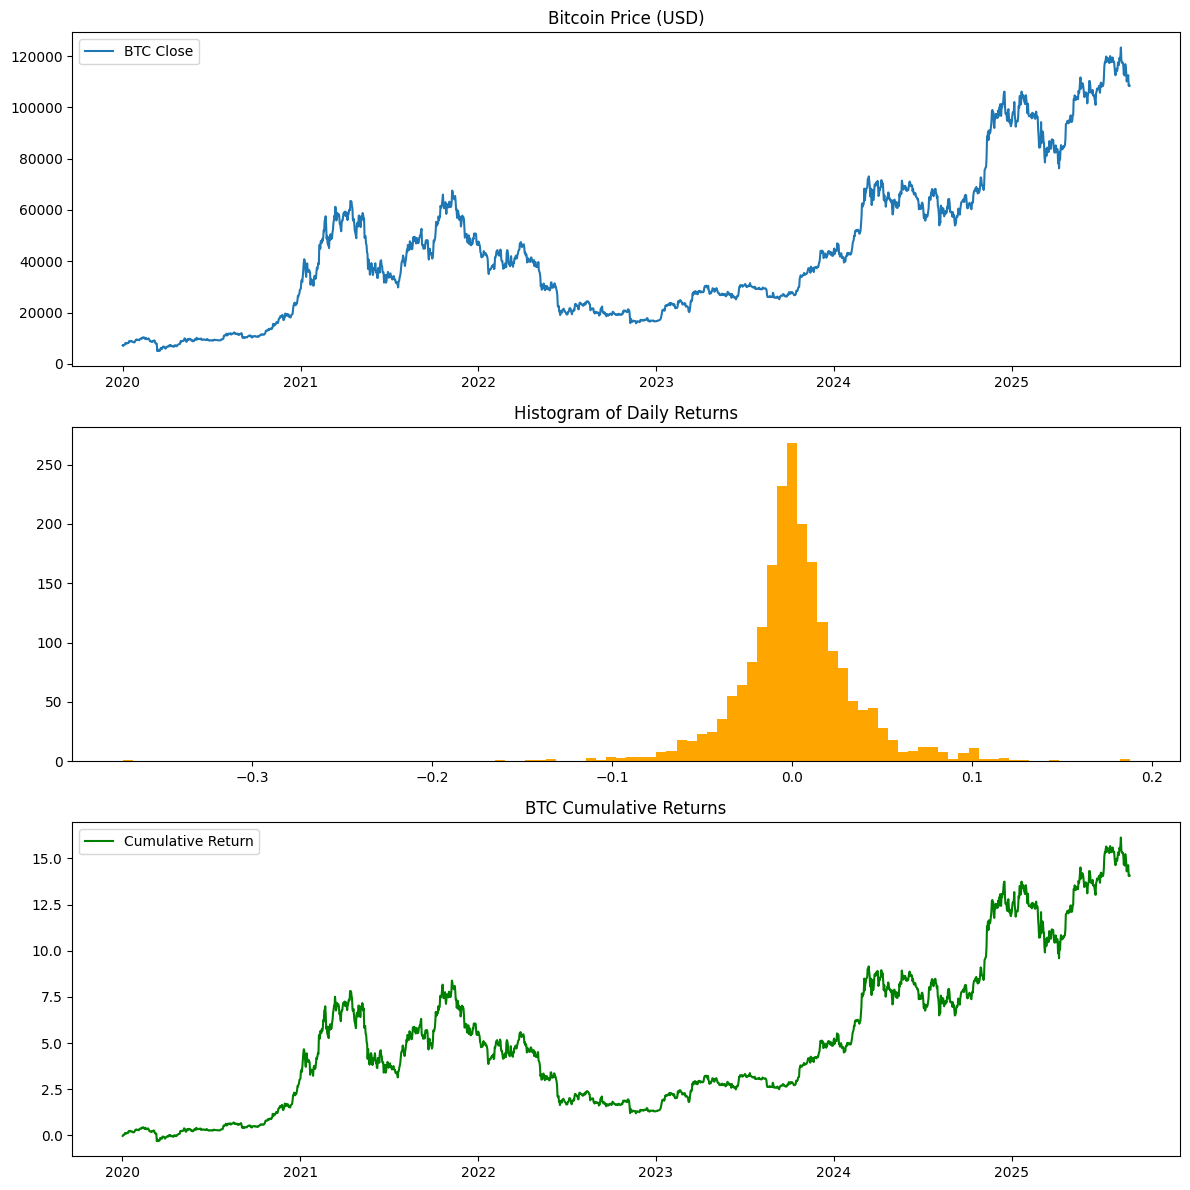

In [6]:
# Plot charts

fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# BTC price
axs[0].plot(btc['Close'], label='BTC Close')
axs[0].set_title("Bitcoin Price (USD)")
axs[0].legend()

# Daily returns histogram
axs[1].hist(btc['Daily Return'].dropna(), bins=100, color='orange')
axs[1].set_title("Histogram of Daily Returns")

# Cumulative returns
axs[2].plot(btc['Cumulative Return'], label='Cumulative Return', color='green')
axs[2].set_title("BTC Cumulative Returns")
axs[2].legend()

plt.tight_layout()
plt.show()

In [7]:
# Save processed data

import os
os.makedirs("data", exist_ok=True)
btc.to_csv("data/btc_basic_analysis.csv")